# Taller 5

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm


## 1. Ecuación diferencial de Poisson



In [13]:
h=0.1
x=np.arange(0,20,h)
y=np.arange(0,20,h)

In [56]:
def h1(x,y):
    return 10.

def h2(x,y):
    return 0.

def h3 (x,y):
    return 0.

def h4(x,y):
    return 0.

In [57]:
def initT():
    T = np.zeros((len(y),len(x)))
    T[0,:] = h1(x[0],y[0])
    T[20,:] = h2(x[0],y[0])
    T[:,0] = h3(x[0],y[0])
    T[:,20] = h4(x[0],y[0])
    return T

In [58]:
T=initT()
T

array([[ 0., 10., 10., ..., 10., 10., 10.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [59]:
def Poisson(x,y):
    return np.exp(-x*y)

In [60]:
def Relajacion(T,f,Nit = int(1e5), omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )+ 0.25*h**2 * f(x[i],y[i])
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax
        

In [61]:
T_sol,itmax=Relajacion(T,Poisson)


  1%|          | 507/100000 [03:13<10:33:19,  2.62it/s]


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


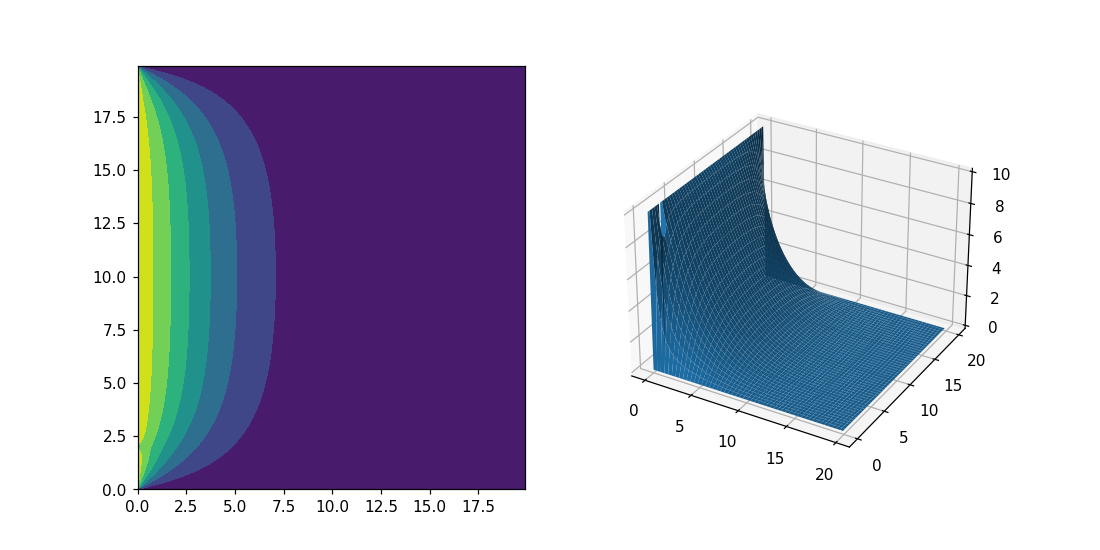

In [47]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,T_sol.T)

ax1.plot_surface(X,Y,T_sol.T)

## 2. Conducción de calor 2D

### a)

In [104]:
dx=0.2
dy=0.2
dt=0.1 
x=np.arange(0,1,dx)
y=np.arange(0,1,dy)
t=np.arange(0,1,dt)
alpha=1
beta=1

lambda_ = (alpha*dt)/dx**2
mu_ = (beta*dt)/dy**2

len(x),len(t)

(5, 10)

In [105]:
def Ti(x,y,t):
    return np.sin(np.pi*(x+y))

### b)

In [106]:
def h6(x,y,t):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*y)

def h7(x,y,t):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*x)

def h8 (x,y,t):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*(1+y))

def h9(x,y,t):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*(1+x))


In [107]:
def InitT():
    
    T = np.zeros((len(x),len(y),len(t)))
    T[:,:,0]=Ti(x,y,t)
    for l in range(1,len(t)):
 
        T[0,:,l] = h6(x,y,t[l])
        T[-1,:,l] = h7(x,y,t[l])
        T[:,0,l] = h8(x,y,t[l])
        T[:,1,l] = h9(x,y,t[l])
    
    return T

In [108]:
T=InitT()

In [109]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        T[0,:,l] = h6(x,y,t[l])
        T[-1,:,l] = h7(x,y,t[l])
        T[:,0,l] = h8(x,y,t[l])
        T[:,1,l] = h9(x,y,t[l])
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                

In [110]:
GetSolution()

 44%|████▍     | 4/9 [00:00<00:00, 7928.74it/s]


IndexError: index 5 is out of bounds for axis 0 with size 5

## 3. Ecuación de onda 2D en coordenadas cilíndricas


$u^{l+1}_{ij}=v^2\Big[u^l_{i+1j}-2u^l_{ij}+u^l_{i-1j} +\frac{\Delta \rho}{\rho[i]}(u^l_{ij}-u^l_{i-1j})+\Big( \frac{\lambda}{\rho[i]}\Big)^2 (u^l_{ij+1}-2u^l_{ij}+u,^l_{ij-1})\Big]+2u^l_{ij}-u^{l-1}_{ij}$

donde $\lambda:=\frac{\Delta \rho}{\Delta \phi}$ y $v:=\frac{\alpha \Delta t}{\Delta \rho}$

## 5. Ecuación de Onda 2D

In [2]:
Nt = 400
Nx = 20
Ny = 20

x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Nx)
t = np.linspace(0,3,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 2.

lambda_ = v*deltat/deltax
mu_ = 5*deltat/deltay

print(lambda_,mu_)

0.14285714285714285 0.35714285714285715


In [3]:
def ui(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

In [4]:
u = np.zeros((Nt,Nx,Ny))
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

In [6]:
def GetSolution():
    
    
    for l in tqdm(range(1,len(t))):
        
        if l == 1:
            u[l,:,:] = u[l-1,:,:]
        else:
        
            for i in range(1,len(x)-1):
                for j in range(1,len(y)-1):
                    u[l,i,j] = 2*(1-lambda_**2-mu_**2)*u[l-1,i,j] \
                    + lambda_**2*( u[l-1,i+1,j] + u[l-1,i-1,j] ) \
                    + mu_**2*( u[l-1,i,j+1] + u[l-1,i,j-1] ) \
                    - u[l-2,i,j] 

In [7]:
GetSolution()

100%|██████████| 399/399 [00:01<00:00, 372.45it/s]


<IPython.core.display.Javascript object>


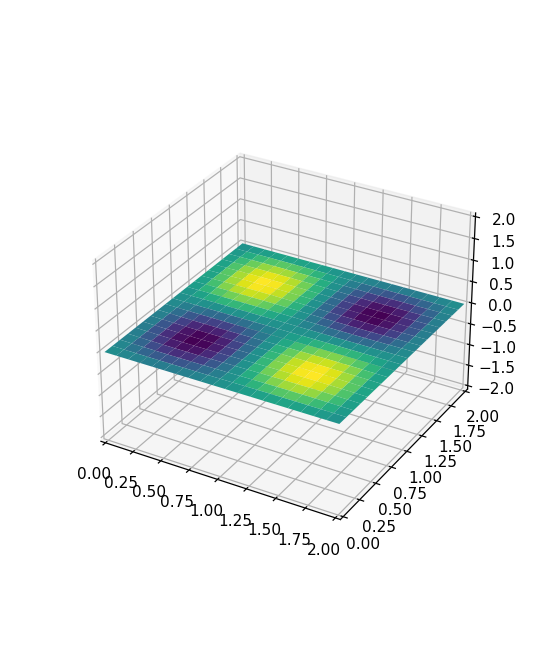

In [10]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,2)
    ax.set_ylim3d(0,2)
    ax.set_zlim3d(-2,2)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)
